# Developing a hand gesture recognition model which can accurately identify and classify different hand gestures 

In [1]:
import os
import cv2
import numpy as np
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import random
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop,Adam
from tensorflow.keras import layers, models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [5]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/85/15/cf99a373812d37f8ae99752a34a9f5f690d820ceb5b302e922705bc18944/tensorflow-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for tensorflow-macos==2.15.0 from https://files.pythonhosted.org/packages/eb/9f/0759e2fea4a3c48f070b64811c2c57036b46353ba87263afc810b8f4188a/tensorflow_macos-2.15.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/32/1f/981809b77b71972beec34b3ff5422c1b1f7e519daac7b3cbd055c05ba2cf/libclang-16.0.6-py2.py3-none-macosx_11_0_arm64.whl.metadata
  Ob

  Obtaining dependency information for cachetools<6.0,>=2.0.0 from https://files.pythonhosted.org/packages/a2/91/2d843adb9fbd911e0da45fbf6f18ca89d07a087c3daa23e955584f90ebf4/cachetools-5.3.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 2.8 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 4.1 MB/s eta 0:00:00a 0:

In [2]:
# Reading the data (gestures images)
path = "/Users/swaroop/Downloads/PRODIGY_ML_04-main/Dataset/leapGestRecog" 
hand_gestures = ["01_palm", "02_l", "03_fist", "04_fist_moved", "05_thumb", "06_index", "07_ok", "08_palm_moved", "09_c", "10_down"]
final_data = [] # An empty list to hold the dictionaries for each gesture.
image_size = (150, 150)

for file in range(10): # Looping through the 10 files containing the gestures.
    file_data = os.path.join(path, f"{file:02d}")
    for gesture in hand_gestures: # Looping through the gestures files.
        gestures_img = os.path.join(file_data, gesture)
        if os.path.exists(gestures_img):
            for filename in os.listdir(gestures_img): # Looping through the images in each gestures file.
                if filename.endswith((".png", ".jpg")):
                    image_path = os.path.join(gestures_img, filename)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    if image is not None: # Checking if it's a valid image
                        resized_image = cv2.resize(image, image_size)
                        final_data.append({"gesture": gesture, "image": resized_image})

total_count = len(final_data)
print(f"total data count: {total_count}")

total data count: 20000


In [3]:
images = np.array([item['image'] for item in final_data])
labels = np.array([item['gesture'] for item in final_data])
images = np.array(images, dtype = 'float32')
labels = np.array(labels)
labels = labels.reshape(total_count, 1)

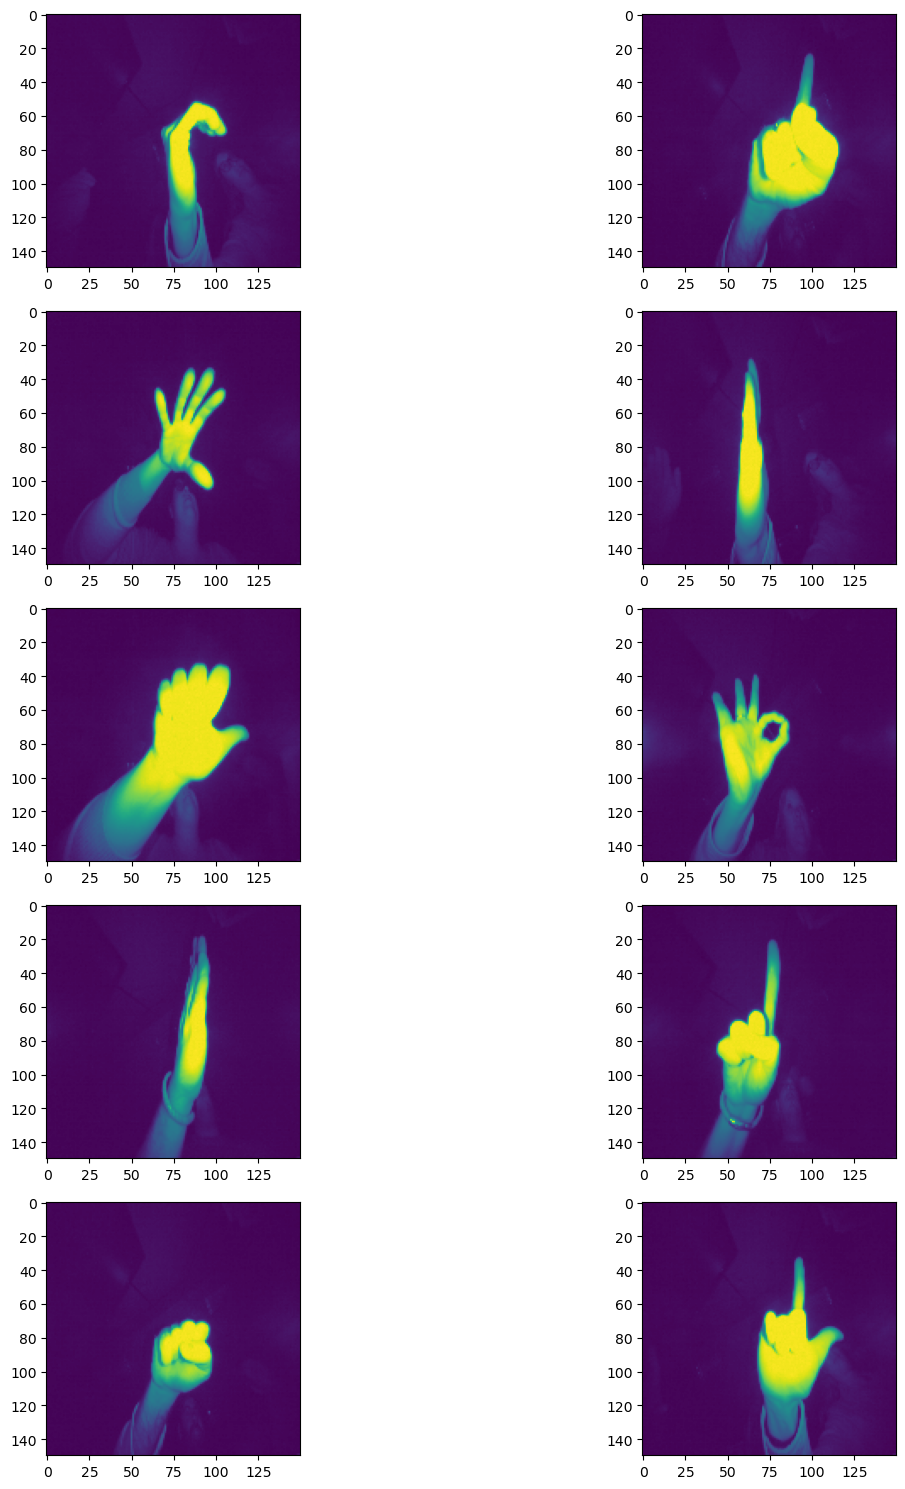

In [4]:
fig,ax = plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l = random.randint(0,len(labels))
        ax[i,j].imshow(images[l])     
plt.tight_layout()

In [5]:
# Converting the labels to numerical representation
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical 
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

/Users/swaroop/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 42)

In [7]:
X_train.shape

(16000, 150, 150)

In [8]:
y_train.shape

(16000, 10)

In [9]:
from keras.models import save_model
# CNN model
model = models.Sequential()
# 1st Layer
model.add(Conv2D(filters = 15, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150, 150, 1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# 2nd layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(Dense(len(hand_gestures), activation = 'softmax'))

# Inialize the optimizer
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
# Compile the model
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 1, restore_best_weights = True)
# Train the model (training history)
history = model.fit(X_train, y_train, epochs = 3, batch_size = 250, validation_data = (X_test, y_test), callbacks = [early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Epoch 1/3
64/64 [==============================] - 64s 993ms/step - loss: 59.5727 - accuracy: 0.5843 - val_loss: 0.1433 - val_accuracy: 0.9682
Epoch 2/3
64/64 [==============================] - 60s 928ms/step - loss: 0.0410 - accuracy: 0.9889 - val_loss: 0.0203 - val_accuracy: 0.9970
Epoch 3/3
125/125 [==============================] - 4s 33ms/step - loss: 0.0093 - accuracy: 0.9987
Test Accuracy: 0.9987499713897705


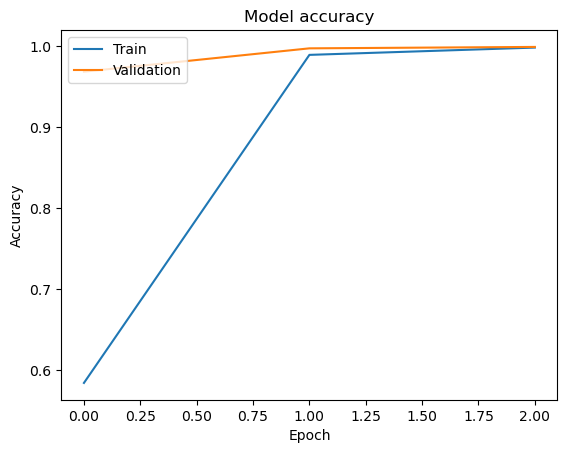

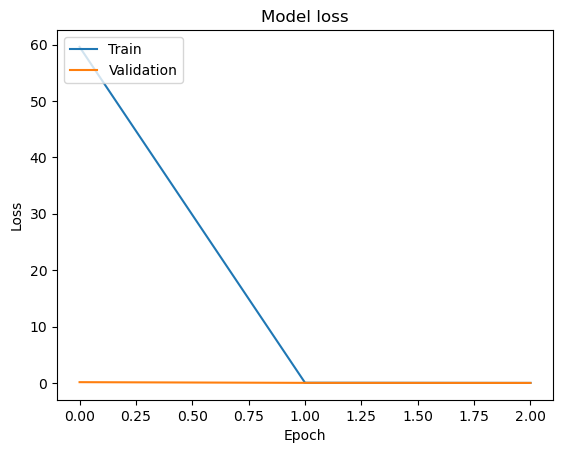

In [10]:
# Plotting the learning curves
def plot_learning_curves(history):
    # The training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper left')
    plt.show()

    # The training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper left')
    plt.show()

plot_learning_curves(history)

Larger numbers of filters can capture more complex patterns in the data. However, having too many filters can also lead to overfitting, especially with a smaller dataset. A larger filter captures more global features. Dropout helps prevent overfitting by randomly setting a fraction of input units to zero during training. A larger batch size can lead to more stable training.

In [11]:
# Save the model
model.save('/Users/swaroop/Downloads/PRODIGY_ML_04-main')

INFO:tensorflow:Assets written to: /Users/swaroop/Downloads/PRODIGY_ML_04-main/assets


INFO:tensorflow:Assets written to: /Users/swaroop/Downloads/PRODIGY_ML_04-main/assets


In [13]:
# Load the pre-trained CNN model
from keras.models import load_model
model = load_model('/Users/swaroop/Downloads/PRODIGY_ML_04-main')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 15)      390       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 15)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 15)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4352      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 32)        0

In [15]:
# Map labels to gestures
gesture_mapping = {
    0: "01_palm", 1: "02_l", 2: "03_fist", 3: "04_fist_moved",
    4: "05_thumb", 5: "06_index", 6: "07_ok", 7: "08_palm_moved",
    8: "09_c", 9: "10_down"
}

# Camera Initialization
cap = cv2.VideoCapture(0)  # 0 --> Default camera

# Background subtractor using KNN to capture the gesture witin the frame
bg_subtractor = cv2.createBackgroundSubtractorKNN(history = 500, dist2Threshold = 400.0, detectShadows = False)

while True:
    # Frame-by-frame capture
    ret, frame = cap.read()

    # Convert frame to the HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Skin color in HSV range
    lower_skin = np.array([0, 20, 70], dtype = np.uint8)
    upper_skin = np.array([20, 255, 255], dtype = np.uint8)

    # Threshold the HSV image to capture the skin color
    mask_skin = cv2.inRange(hsv, lower_skin, upper_skin)

    # Applying background subtraction
    fg_mask = bg_subtractor.apply(frame)

    # Combining the skin mask with the background subtractor mask
    mask_combined = cv2.bitwise_and(mask_skin, mask_skin, mask = fg_mask)

    # Morphological operations to reduce noise
    kernel = np.ones((5, 5), np.uint8)
    mask_combined = cv2.morphologyEx(mask_combined, cv2.MORPH_OPEN, kernel)
    mask_combined = cv2.morphologyEx(mask_combined, cv2.MORPH_CLOSE, kernel)

    # Apply combined mask to the original frame
    segmented_hand = cv2.bitwise_and(frame, frame, mask = mask_combined)

    # Convert the segmented frame to grayscale
    gray = cv2.cvtColor(segmented_hand, cv2.COLOR_BGR2GRAY)

    # Resize the segmented frame to match the model's input size
    resized_frame = cv2.resize(gray, (150, 150))

    # Reshape the frame to match the input shape of the model
    input_data_arr = np.array(resized_frame)
    input_data = input_data_arr.reshape((1, 150, 150, 1))  # Ensure single channel

    # Model predictions
    prediction = model.predict(input_data)
    predicted_label = np.argmax(prediction)

    print("Raw Prediction:", prediction)

    # Map to the gesture
    predicted_gesture = gesture_mapping[predicted_label]

    # Display frame with the predicted gesture
    cv2.putText(frame, f"Predicted Gesture: {predicted_gesture}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Hand Gesture Recognition', frame)
    print("Predicted Probabilities:", prediction)

    # Break the loop when 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release camera and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 55ms/step
Raw Prediction: [[0.10005929 0.09957759 0.09978603 0.10057855 0.09959267 0.09947841
  0.09877831 0.10220321 0.09931935 0.10062652]]
Predicted Probabilities: [[0.10005929 0.09957759 0.09978603 0.10057855 0.09959267 0.09947841
  0.09877831 0.10220321 0.09931935 0.10062652]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.7397808e-06 1.6594005e-06 9.5624471e-01 3.8101508e-11 3.3042525e-12
  2.7248045e-04 4.3421127e-02 4.1265030e-11 5.7994988e-08 5.6188190e-05]]
Predicted Probabilities: [[3.7397808e-06 1.6594005e-06 9.5624471e-01 3.8101508e-11 3.3042525e-12
  2.7248045e-04 4.3421127e-02 4.1265030e-11 5.7994988e-08 5.6188190e-05]]
1/1 [==============================] - 0s 13ms/step
Raw Prediction: [[5.1909511e-04 6.2253021e-05 4.9786845e-01 6.2410001e-11 3.4064338e-11
  9.6912705e-04 4.9931630e-01 5.9104072e-10 1.5146132e-07 1.2645967e-03]]
Predicted Probabilities: [[5.1909511e-04 6.2253021e-05 4.9786845e-01 6.24100

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.5158358e-04 1.6027626e-04 5.3388189e-04 2.6217049e-06 2.6585893e-05
  3.5424489e-03 9.9521798e-01 9.2009519e-05 2.3936671e-05 1.4860230e-04]]
Predicted Probabilities: [[2.5158358e-04 1.6027626e-04 5.3388189e-04 2.6217049e-06 2.6585893e-05
  3.5424489e-03 9.9521798e-01 9.2009519e-05 2.3936671e-05 1.4860230e-04]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.1194651e-05 1.1501598e-05 5.6218350e-04 2.0677119e-06 2.8631573e-06
  8.7774730e-05 9.9927109e-01 3.4992122e-06 9.9866304e-07 4.6855570e-05]]
Predicted Probabilities: [[1.1194651e-05 1.1501598e-05 5.6218350e-04 2.0677119e-06 2.8631573e-06
  8.7774730e-05 9.9927109e-01 3.4992122e-06 9.9866304e-07 4.6855570e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.0751896e-05 8.8129982e-06 3.3167227e-05 1.1859405e-06 2.3148054e-05
  1.8732507e-04 9.9971324e-01 2.8091417e-06 1.7265069e-05 2.3173045e-06]]
Predicted Probab

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[1.8503105e-06 3.9758396e-07 9.8610145e-01 2.6355820e-09 1.1335051e-06
  1.2926653e-04 1.3614586e-02 2.3567836e-06 1.5351233e-06 1.4751217e-04]]
Predicted Probabilities: [[1.8503105e-06 3.9758396e-07 9.8610145e-01 2.6355820e-09 1.1335051e-06
  1.2926653e-04 1.3614586e-02 2.3567836e-06 1.5351233e-06 1.4751217e-04]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[5.2369683e-04 6.3424782e-06 9.7484970e-01 7.7288789e-09 4.0087340e-05
  4.9026888e-03 1.9580349e-02 1.6925247e-05 3.0191468e-06 7.7223733e-05]]
Predicted Probabilities: [[5.2369683e-04 6.3424782e-06 9.7484970e-01 7.7288789e-09 4.0087340e-05
  4.9026888e-03 1.9580349e-02 1.6925247e-05 3.0191468e-06 7.7223733e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.7702210e-03 2.1791479e-05 6.0241728e-04 5.2250664e-07 8.1587945e-11
  3.8547256e-05 6.0019080e-05 6.9382751e-01 4.7256790e-07 3.0367848e-01]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.6784045e-02 2.5911787e-01 3.7597828e-02 8.8631228e-02 3.7146862e-08
  9.8454207e-02 2.4562110e-03 4.0670726e-01 9.8469248e-03 6.0404468e-02]]
Predicted Probabilities: [[3.6784045e-02 2.5911787e-01 3.7597828e-02 8.8631228e-02 3.7146862e-08
  9.8454207e-02 2.4562110e-03 4.0670726e-01 9.8469248e-03 6.0404468e-02]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[0.02648075 0.2081694  0.20878504 0.00284155 0.00042207 0.1959705
  0.31904456 0.00503929 0.0032193  0.03002754]]
Predicted Probabilities: [[0.02648075 0.2081694  0.20878504 0.00284155 0.00042207 0.1959705
  0.31904456 0.00503929 0.0032193  0.03002754]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.8978173e-02 1.3331006e-01 2.2151992e-01 4.8613655e-03 9.1042220e-06
  2.4494936e-01 1.5885182e-01 8.6950146e-02 1.7408248e-02 1.1316183e-01]]
Predicted Probabilities: [[1.8978173e-02 1.3331006e-01 2.2151992e-01 4.8613655

Predicted Probabilities: [[5.3443968e-05 4.6820935e-07 7.8364834e-04 3.8808072e-09 2.7835937e-13
  4.0939962e-03 6.2645275e-05 1.4319134e-04 1.6984576e-07 9.9486250e-01]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[1.13595091e-03 2.82789661e-05 2.48801410e-02 2.42351547e-07
  2.19349972e-12 2.15876455e-04 2.05510878e-05 1.09424135e-02
  6.07544592e-08 9.62776363e-01]]
Predicted Probabilities: [[1.13595091e-03 2.82789661e-05 2.48801410e-02 2.42351547e-07
  2.19349972e-12 2.15876455e-04 2.05510878e-05 1.09424135e-02
  6.07544592e-08 9.62776363e-01]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[3.7133686e-02 2.9040035e-04 6.8262869e-01 2.0534056e-04 6.1791322e-11
  1.8099126e-03 5.6240110e-06 3.4317032e-02 9.2497285e-06 2.4360010e-01]]
Predicted Probabilities: [[3.7133686e-02 2.9040035e-04 6.8262869e-01 2.0534056e-04 6.1791322e-11
  1.8099126e-03 5.6240110e-06 3.4317032e-02 9.2497285e-06 2.4360010e-01]]
1/1 [==============================

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[1.3600910e-06 3.0947967e-07 1.4108649e-01 3.0611405e-02 1.4247893e-10
  2.2761691e-04 1.4744160e-06 7.4963766e-04 8.2717985e-01 1.4178226e-04]]
Predicted Probabilities: [[1.3600910e-06 3.0947967e-07 1.4108649e-01 3.0611405e-02 1.4247893e-10
  2.2761691e-04 1.4744160e-06 7.4963766e-04 8.2717985e-01 1.4178226e-04]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.14930284e-04 1.98243488e-05 1.54451467e-02 4.48690524e-04
  8.56078652e-10 3.35734774e-04 4.63991165e-02 2.09770519e-02
  9.12543893e-01 3.71559849e-03]]
Predicted Probabilities: [[1.14930284e-04 1.98243488e-05 1.54451467e-02 4.48690524e-04
  8.56078652e-10 3.35734774e-04 4.63991165e-02 2.09770519e-02
  9.12543893e-01 3.71559849e-03]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.6762989e-04 4.7502845e-06 8.7366228e-05 1.6110492e-04 9.2345289e-12
  2.9236209e-05 9.7370064e-01 2.1174846e-02 4.3202718e-03 1.541062

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[6.4093727e-03 8.0380589e-01 1.3765838e-05 5.4848135e-02 1.8946302e-07
  3.8258117e-04 2.7424285e-08 2.1548152e-05 1.0937040e-01 2.5148058e-02]]
Predicted Probabilities: [[6.4093727e-03 8.0380589e-01 1.3765838e-05 5.4848135e-02 1.8946302e-07
  3.8258117e-04 2.7424285e-08 2.1548152e-05 1.0937040e-01 2.5148058e-02]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.1973652e-02 8.1974989e-01 4.0051174e-05 3.4231574e-03 6.2359879e-07
  1.3709034e-01 2.4847677e-06 1.0189564e-04 9.3529662e-03 1.8264962e-02]]
Predicted Probabilities: [[1.1973652e-02 8.1974989e-01 4.0051174e-05 3.4231574e-03 6.2359879e-07
  1.3709034e-01 2.4847677e-06 1.0189564e-04 9.3529662e-03 1.8264962e-02]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.1921975e-05 9.9390125e-01 1.2959027e-05 3.0836536e-04 1.5858822e-08
  4.4998214e-05 2.4239156e-07 8.0571081e-06 5.2584866e-03 3.7363131e-04]]
Predicted Probab

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[3.7755869e-02 8.3471322e-01 7.9122832e-04 1.0996894e-01 1.4278460e-07
  7.2417915e-06 1.6919608e-06 1.2027805e-02 7.9995900e-04 3.9338931e-03]]
Predicted Probabilities: [[3.7755869e-02 8.3471322e-01 7.9122832e-04 1.0996894e-01 1.4278460e-07
  7.2417915e-06 1.6919608e-06 1.2027805e-02 7.9995900e-04 3.9338931e-03]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[2.9207241e-02 8.5088682e-01 3.5079571e-05 3.5610240e-02 1.7973022e-07
  1.2084736e-05 6.3138827e-07 2.1075854e-02 1.2332769e-02 5.0839137e-02]]
Predicted Probabilities: [[2.9207241e-02 8.5088682e-01 3.5079571e-05 3.5610240e-02 1.7973022e-07
  1.2084736e-05 6.3138827e-07 2.1075854e-02 1.2332769e-02 5.0839137e-02]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[1.3523832e-01 1.1990447e-01 2.1613287e-05 1.0546483e-01 1.7239026e-07
  5.2989032e-03 3.9364568e-07 1.1415627e-02 6.4421911e-03 6.1621344e-01]]
Predicted Probab

Predicted Probabilities: [[9.9773154e-02 8.9694506e-01 1.4984002e-08 2.2471439e-04 2.0512965e-05
  2.7274161e-03 5.9683314e-10 1.0849059e-08 1.4550303e-04 1.6356241e-04]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.6153458e-02 9.5791465e-01 1.8003186e-08 8.9647394e-04 3.3251213e-06
  2.9496690e-03 2.0668360e-09 1.3692373e-07 1.8428276e-04 1.8978632e-03]]
Predicted Probabilities: [[3.6153458e-02 9.5791465e-01 1.8003186e-08 8.9647394e-04 3.3251213e-06
  2.9496690e-03 2.0668360e-09 1.3692373e-07 1.8428276e-04 1.8978632e-03]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.6123595e-01 5.8802879e-01 2.8840786e-08 1.3990590e-03 7.1360375e-04
  4.4429958e-02 7.9449718e-09 2.7039528e-07 7.7848753e-04 3.4139003e-03]]
Predicted Probabilities: [[3.6123595e-01 5.8802879e-01 2.8840786e-08 1.3990590e-03 7.1360375e-04
  4.4429958e-02 7.9449718e-09 2.7039528e-07 7.7848753e-04 3.4139003e-03]]
1/1 [==============================] - 0s 12ms/step
Raw Pre

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.3983176e-04 9.6940839e-01 1.1306418e-05 1.5052412e-02 2.6479425e-04
  3.5043826e-04 1.1620121e-05 9.3505378e-06 1.4144101e-02 1.0780549e-04]]
Predicted Probabilities: [[6.3983176e-04 9.6940839e-01 1.1306418e-05 1.5052412e-02 2.6479425e-04
  3.5043826e-04 1.1620121e-05 9.3505378e-06 1.4144101e-02 1.0780549e-04]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[1.3550761e-04 8.1505066e-01 1.1642676e-05 3.0823454e-02 8.6027649e-05
  9.8101492e-04 1.2219598e-05 4.3499240e-06 1.5261845e-01 2.7672277e-04]]
Predicted Probabilities: [[1.3550761e-04 8.1505066e-01 1.1642676e-05 3.0823454e-02 8.6027649e-05
  9.8101492e-04 1.2219598e-05 4.3499240e-06 1.5261845e-01 2.7672277e-04]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.7025101e-04 5.4142511e-01 2.6898085e-06 1.9375119e-02 1.3138449e-05
  3.5913827e-04 9.8439223e-06 5.9162190e-05 4.3792287e-01 4.6272395e-04]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.4739747e-01 6.1935389e-01 5.6978314e-07 1.1559577e-03 4.4236043e-07
  1.5775954e-04 2.3372197e-05 2.1922745e-01 2.7620478e-03 9.9210897e-03]]
Predicted Probabilities: [[1.4739747e-01 6.1935389e-01 5.6978314e-07 1.1559577e-03 4.4236043e-07
  1.5775954e-04 2.3372197e-05 2.1922745e-01 2.7620478e-03 9.9210897e-03]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[1.5379417e-01 4.4427779e-01 1.5892310e-07 3.1284762e-03 3.1427666e-07
  4.3390185e-04 6.5795734e-06 3.4121573e-01 6.2183957e-03 5.0924480e-02]]
Predicted Probabilities: [[1.5379417e-01 4.4427779e-01 1.5892310e-07 3.1284762e-03 3.1427666e-07
  4.3390185e-04 6.5795734e-06 3.4121573e-01 6.2183957e-03 5.0924480e-02]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[7.96650276e-02 7.65797675e-01 1.39057488e-06 1.97772086e-02
  2.08037159e-06 6.21132844e-04 4.24644968e-05 1.03515185e-01
  1.11792022e-02 1.93986613e-02]]
Pred

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[8.6984839e-03 7.6866192e-01 8.9468801e-07 8.8902644e-04 5.7035647e-09
  2.4000292e-06 2.6174018e-06 1.4889756e-01 4.4741426e-03 6.8372987e-02]]
Predicted Probabilities: [[8.6984839e-03 7.6866192e-01 8.9468801e-07 8.8902644e-04 5.7035647e-09
  2.4000292e-06 2.6174018e-06 1.4889756e-01 4.4741426e-03 6.8372987e-02]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.6755091e-02 8.0910599e-01 3.6027950e-07 2.4708422e-04 1.5895488e-08
  2.3878290e-05 4.4406456e-06 1.3547462e-01 1.1805989e-03 3.7207853e-02]]
Predicted Probabilities: [[1.6755091e-02 8.0910599e-01 3.6027950e-07 2.4708422e-04 1.5895488e-08
  2.3878290e-05 4.4406456e-06 1.3547462e-01 1.1805989e-03 3.7207853e-02]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.3374956e-02 5.9611881e-01 1.0383534e-06 5.7685841e-04 7.9992244e-09
  2.0762000e-05 6.2434915e-06 2.9625180e-01 1.1572733e-03 6.2492199e-02]]
Predicted Probab

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[6.7821510e-02 1.3214985e-01 1.1701813e-08 1.7342472e-03 1.1463835e-09
  2.5124717e-05 4.3317039e-05 3.1774831e-03 2.2969039e-03 7.9275161e-01]]
Predicted Probabilities: [[6.7821510e-02 1.3214985e-01 1.1701813e-08 1.7342472e-03 1.1463835e-09
  2.5124717e-05 4.3317039e-05 3.1774831e-03 2.2969039e-03 7.9275161e-01]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.2604430e-02 8.0729373e-02 2.8798558e-08 1.6533326e-03 4.8834817e-08
  2.9384746e-04 8.4338179e-05 2.2004393e-01 2.6561632e-03 6.6193444e-01]]
Predicted Probabilities: [[3.2604430e-02 8.0729373e-02 2.8798558e-08 1.6533326e-03 4.8834817e-08
  2.9384746e-04 8.4338179e-05 2.2004393e-01 2.6561632e-03 6.6193444e-01]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.9295924e-01 1.2430195e-01 3.4878445e-07 1.0173307e-02 1.9182993e-05
  1.8438175e-03 1.5499042e-03 3.7227231e-01 1.1759517e-01 7.9284713e-02]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.75077864e-03 9.98128474e-01 5.24114000e-07 1.14552706e-04
  6.54281074e-10 5.05190627e-08 5.92071148e-09 3.55947205e-09
  4.85883038e-06 8.34244247e-07]]
Predicted Probabilities: [[1.75077864e-03 9.98128474e-01 5.24114000e-07 1.14552706e-04
  6.54281074e-10 5.05190627e-08 5.92071148e-09 3.55947205e-09
  4.85883038e-06 8.34244247e-07]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.9725094e-03 9.9599993e-01 1.1124116e-06 2.5601819e-05 1.0725098e-10
  1.1408329e-08 3.2605274e-09 1.5857902e-09 3.3384728e-07 4.6709533e-07]]
Predicted Probabilities: [[3.9725094e-03 9.9599993e-01 1.1124116e-06 2.5601819e-05 1.0725098e-10
  1.1408329e-08 3.2605274e-09 1.5857902e-09 3.3384728e-07 4.6709533e-07]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[5.4296028e-02 9.4569099e-01 1.2503510e-07 1.1742355e-05 2.9155792e-11
  8.9312087e-09 1.3088304e-09 9.6182218e-10 2.8963731e-08 1.104874

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[4.8276839e-01 5.1417047e-01 4.3729260e-11 3.0564396e-03 6.3358527e-08
  1.1051130e-06 6.3485328e-07 2.4833996e-08 1.9069108e-06 1.0231215e-06]]
Predicted Probabilities: [[4.8276839e-01 5.1417047e-01 4.3729260e-11 3.0564396e-03 6.3358527e-08
  1.1051130e-06 6.3485328e-07 2.4833996e-08 1.9069108e-06 1.0231215e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.1648477e-01 8.0744430e-02 2.9639241e-10 2.7534873e-03 9.0089536e-08
  1.8820689e-06 1.1201127e-05 1.4817134e-07 1.1343883e-06 2.8009360e-06]]
Predicted Probabilities: [[9.1648477e-01 8.0744430e-02 2.9639241e-10 2.7534873e-03 9.0089536e-08
  1.8820689e-06 1.1201127e-05 1.4817134e-07 1.1343883e-06 2.8009360e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.1483110e-01 8.3288170e-02 9.1324344e-11 1.8725180e-03 6.9313337e-08
  3.5988414e-06 9.0033518e-07 3.5144584e-08 4.2916332e-07 3.1086206e-06]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.9031813e-02 9.5030034e-01 1.1465077e-09 6.3005544e-04 1.2237983e-09
  4.5685759e-08 4.2518295e-07 1.2932484e-05 6.3326856e-06 1.8078066e-05]]
Predicted Probabilities: [[4.9031813e-02 9.5030034e-01 1.1465077e-09 6.3005544e-04 1.2237983e-09
  4.5685759e-08 4.2518295e-07 1.2932484e-05 6.3326856e-06 1.8078066e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.2986913e-02 9.6654773e-01 1.5333016e-09 4.0373532e-04 4.8416942e-09
  6.8499958e-08 2.3793490e-07 1.3661394e-05 5.6998442e-06 4.1942792e-05]]
Predicted Probabilities: [[3.2986913e-02 9.6654773e-01 1.5333016e-09 4.0373532e-04 4.8416942e-09
  6.8499958e-08 2.3793490e-07 1.3661394e-05 5.6998442e-06 4.1942792e-05]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[1.5494766e-02 9.8390180e-01 6.6414146e-10 5.7172321e-04 1.6934008e-09
  2.1742878e-08 6.2875877e-08 7.9149286e-06 3.6278122e-06 2.0235913e-05]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.7885261e-02 9.5209378e-01 6.8868136e-12 1.9995698e-05 1.5517382e-09
  1.8368551e-07 4.8811824e-08 1.2044867e-08 1.8164700e-07 4.8871237e-07]]
Predicted Probabilities: [[4.7885261e-02 9.5209378e-01 6.8868136e-12 1.9995698e-05 1.5517382e-09
  1.8368551e-07 4.8811824e-08 1.2044867e-08 1.8164700e-07 4.8871237e-07]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.8591133e-01 8.1392759e-01 5.4450722e-11 1.6050869e-04 1.4991810e-09
  7.7286934e-08 2.2510321e-08 3.5723520e-09 1.3921881e-07 2.0440278e-07]]
Predicted Probabilities: [[1.8591133e-01 8.1392759e-01 5.4450722e-11 1.6050869e-04 1.4991810e-09
  7.7286934e-08 2.2510321e-08 3.5723520e-09 1.3921881e-07 2.0440278e-07]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.2568317e-01 8.7427235e-01 4.9547419e-12 4.4208209e-05 1.7765600e-10
  6.7588452e-08 3.1190261e-09 7.8573509e-10 5.8940341e-08 1.1072634e-07]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.1809082e-06 9.9953508e-01 1.3313793e-07 4.6359291e-04 1.6721227e-11
  1.7330061e-13 7.4756895e-11 1.2444045e-11 9.8869668e-09 4.0140399e-10]]
Predicted Probabilities: [[1.1809082e-06 9.9953508e-01 1.3313793e-07 4.6359291e-04 1.6721227e-11
  1.7330061e-13 7.4756895e-11 1.2444045e-11 9.8869668e-09 4.0140399e-10]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[9.3519975e-07 9.9997592e-01 8.8419516e-10 2.3178482e-05 5.7317432e-12
  6.2456556e-13 1.0431976e-11 2.7547981e-12 7.5397955e-09 1.0009541e-09]]
Predicted Probabilities: [[9.3519975e-07 9.9997592e-01 8.8419516e-10 2.3178482e-05 5.7317432e-12
  6.2456556e-13 1.0431976e-11 2.7547981e-12 7.5397955e-09 1.0009541e-09]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.8574860e-07 9.9999607e-01 2.1755715e-09 3.1727416e-06 3.2989982e-11
  1.0405968e-12 2.5659516e-11 4.5779665e-12 1.5527904e-08 5.1947122e-09]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.4868033e-01 3.2645702e-01 1.0731914e-08 2.1583594e-02 2.9774844e-10
  5.3107808e-08 7.3312788e-07 9.4810389e-07 2.4815735e-03 7.9566200e-04]]
Predicted Probabilities: [[6.4868033e-01 3.2645702e-01 1.0731914e-08 2.1583594e-02 2.9774844e-10
  5.3107808e-08 7.3312788e-07 9.4810389e-07 2.4815735e-03 7.9566200e-04]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[7.1947658e-01 2.7969393e-01 1.2138593e-09 6.7195587e-04 9.6851131e-11
  1.9446846e-08 4.2544758e-07 3.1085204e-07 6.4911816e-05 9.1791757e-05]]
Predicted Probabilities: [[7.1947658e-01 2.7969393e-01 1.2138593e-09 6.7195587e-04 9.6851131e-11
  1.9446846e-08 4.2544758e-07 3.1085204e-07 6.4911816e-05 9.1791757e-05]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[6.0448349e-01 3.8923752e-01 2.4417046e-09 5.5123735e-03 9.0818103e-10
  2.5803871e-08 1.7353831e-06 1.1763485e-06 4.1965290e-05 7.2175497e-04]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.0351210e-03 2.2744569e-03 6.6973666e-07 1.2012827e-01 1.7348623e-11
  2.1499534e-06 4.1725048e-07 6.1519426e-01 2.6130900e-01 5.5655550e-05]]
Predicted Probabilities: [[1.0351210e-03 2.2744569e-03 6.6973666e-07 1.2012827e-01 1.7348623e-11
  2.1499534e-06 4.1725048e-07 6.1519426e-01 2.6130900e-01 5.5655550e-05]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[1.6970164e-04 8.9914817e-04 4.8981415e-06 3.4282783e-01 4.3849989e-12
  3.2380987e-07 1.4233504e-07 4.1879550e-01 2.3729196e-01 1.0496399e-05]]
Predicted Probabilities: [[1.6970164e-04 8.9914817e-04 4.8981415e-06 3.4282783e-01 4.3849989e-12
  3.2380987e-07 1.4233504e-07 4.1879550e-01 2.3729196e-01 1.0496399e-05]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[8.0066512e-04 1.5716702e-03 5.8085816e-06 2.1569894e-01 1.3112990e-11
  9.8695739e-07 3.7188445e-07 5.4821879e-01 2.3368326e-01 1.9483819e-05]]
Predicted Probab

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[1.0205055e-04 4.2805445e-04 1.3030138e-06 3.3446860e-02 1.7819201e-11
  5.1485802e-07 8.5665924e-08 7.4795270e-01 2.1805933e-01 9.0419753e-06]]
Predicted Probabilities: [[1.0205055e-04 4.2805445e-04 1.3030138e-06 3.3446860e-02 1.7819201e-11
  5.1485802e-07 8.5665924e-08 7.4795270e-01 2.1805933e-01 9.0419753e-06]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[9.0489506e-05 8.2674749e-05 5.4089276e-07 1.1549968e-02 4.3246494e-13
  1.2874619e-07 1.6503339e-08 9.5969450e-01 2.8578922e-02 2.7981953e-06]]
Predicted Probabilities: [[9.0489506e-05 8.2674749e-05 5.4089276e-07 1.1549968e-02 4.3246494e-13
  1.2874619e-07 1.6503339e-08 9.5969450e-01 2.8578922e-02 2.7981953e-06]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[6.4507025e-05 5.9449554e-05 6.0108698e-07 1.2921421e-02 9.9206656e-13
  2.6182551e-07 1.3167314e-08 9.5646298e-01 3.0487748e-02 3.0087729e-06]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.0674438e-04 9.7334730e-03 7.8274155e-05 3.6569554e-01 1.7248555e-10
  7.3943879e-06 5.1236992e-07 3.6579004e-01 2.5805533e-01 3.2697772e-05]]
Predicted Probabilities: [[6.0674438e-04 9.7334730e-03 7.8274155e-05 3.6569554e-01 1.7248555e-10
  7.3943879e-06 5.1236992e-07 3.6579004e-01 2.5805533e-01 3.2697772e-05]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[2.1554981e-03 8.9718215e-03 1.9142230e-05 2.3771828e-01 6.4305963e-11
  3.4355086e-05 6.0923173e-07 6.2529266e-01 1.2579110e-01 1.6490023e-05]]
Predicted Probabilities: [[2.1554981e-03 8.9718215e-03 1.9142230e-05 2.3771828e-01 6.4305963e-11
  3.4355086e-05 6.0923173e-07 6.2529266e-01 1.2579110e-01 1.6490023e-05]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[5.2283634e-03 2.2922250e-02 2.0280628e-05 2.1265720e-01 3.9374788e-11
  1.9684977e-04 1.7089471e-07 6.8553877e-01 7.3371448e-02 6.4687731e-05]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[7.47547019e-03 3.75072025e-02 2.18476680e-06 2.44109869e-01
  2.53427568e-09 1.07978194e-04 2.12467921e-06 6.87933147e-01
  2.19099112e-02 9.52148868e-04]]
Predicted Probabilities: [[7.47547019e-03 3.75072025e-02 2.18476680e-06 2.44109869e-01
  2.53427568e-09 1.07978194e-04 2.12467921e-06 6.87933147e-01
  2.19099112e-02 9.52148868e-04]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[2.4674701e-02 3.7084658e-02 3.5801074e-06 1.9561747e-01 6.3649375e-10
  8.0487262e-05 1.6062786e-06 7.3341686e-01 8.3564511e-03 7.6419953e-04]]
Predicted Probabilities: [[2.4674701e-02 3.7084658e-02 3.5801074e-06 1.9561747e-01 6.3649375e-10
  8.0487262e-05 1.6062786e-06 7.3341686e-01 8.3564511e-03 7.6419953e-04]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[3.6399290e-02 2.5167121e-02 3.5168343e-06 2.1623088e-01 2.7470630e-09
  4.6588506e-05 4.4769795e-06 7.0958561e-01 1.2089016e-02 4.734652

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[5.3324699e-01 8.9487322e-02 2.9500316e-06 6.1498310e-02 1.6657214e-07
  2.3912000e-03 2.2656575e-05 3.0535173e-01 3.0698932e-03 4.9287616e-03]]
Predicted Probabilities: [[5.3324699e-01 8.9487322e-02 2.9500316e-06 6.1498310e-02 1.6657214e-07
  2.3912000e-03 2.2656575e-05 3.0535173e-01 3.0698932e-03 4.9287616e-03]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[5.9793383e-01 1.9269344e-01 2.2172012e-06 1.6328348e-01 1.0555355e-07
  1.5475632e-03 1.5301972e-05 3.8869202e-02 2.7711836e-03 2.8837495e-03]]
Predicted Probabilities: [[5.9793383e-01 1.9269344e-01 2.2172012e-06 1.6328348e-01 1.0555355e-07
  1.5475632e-03 1.5301972e-05 3.8869202e-02 2.7711836e-03 2.8837495e-03]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.3133777e-01 4.4297329e-01 1.5823546e-06 7.4019581e-02 8.7477090e-08
  1.4852597e-03 1.4008628e-05 3.6991689e-02 5.5300733e-03 7.6467199e-03]]
Predicted Probab

Predicted Probabilities: [[1.93340391e-01 2.93023884e-02 1.62222612e-04 9.48465914e-02
  1.18790524e-07 8.23978509e-04 2.10538754e-04 6.73258066e-01
  5.27543435e-03 2.78029661e-03]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[5.4335982e-01 3.2924585e-02 1.0320325e-04 8.0429070e-02 1.7132862e-07
  3.3239191e-03 4.4846362e-05 3.3434111e-01 2.7284962e-03 2.7447345e-03]]
Predicted Probabilities: [[5.4335982e-01 3.2924585e-02 1.0320325e-04 8.0429070e-02 1.7132862e-07
  3.3239191e-03 4.4846362e-05 3.3434111e-01 2.7284962e-03 2.7447345e-03]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.2383093e-01 1.7612967e-01 6.2104773e-05 6.9767900e-02 1.4481481e-06
  9.6852081e-03 1.0946103e-04 4.1517338e-01 4.0412582e-03 1.1986539e-03]]
Predicted Probabilities: [[3.2383093e-01 1.7612967e-01 6.2104773e-05 6.9767900e-02 1.4481481e-06
  9.6852081e-03 1.0946103e-04 4.1517338e-01 4.0412582e-03 1.1986539e-03]]
1/1 [==============================] - 0s 12ms/

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[2.2411914e-01 4.1391168e-02 5.3899788e-05 1.9693000e-02 2.4683272e-06
  4.4358750e-03 1.6821412e-04 6.9091976e-01 5.4665242e-04 1.8669752e-02]]
Predicted Probabilities: [[2.2411914e-01 4.1391168e-02 5.3899788e-05 1.9693000e-02 2.4683272e-06
  4.4358750e-03 1.6821412e-04 6.9091976e-01 5.4665242e-04 1.8669752e-02]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[2.3101385e-01 4.7145780e-02 2.0037733e-04 4.7111306e-02 4.4590379e-06
  3.9565838e-03 9.9639257e-04 6.4229536e-01 2.8847523e-03 2.4391148e-02]]
Predicted Probabilities: [[2.3101385e-01 4.7145780e-02 2.0037733e-04 4.7111306e-02 4.4590379e-06
  3.9565838e-03 9.9639257e-04 6.4229536e-01 2.8847523e-03 2.4391148e-02]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[3.3930701e-01 6.1071657e-02 1.9401997e-04 5.0229907e-02 5.1433490e-06
  1.6377963e-03 2.8545022e-04 5.3247887e-01 2.4607850e-03 1.2329361e-02]]
Predicted Probab

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[1.4744574e-01 1.1468639e-01 3.8014716e-04 4.0674323e-01 4.8413409e-07
  1.3074933e-03 1.1471050e-04 2.8500709e-01 2.9526146e-02 1.4788616e-02]]
Predicted Probabilities: [[1.4744574e-01 1.1468639e-01 3.8014716e-04 4.0674323e-01 4.8413409e-07
  1.3074933e-03 1.1471050e-04 2.8500709e-01 2.9526146e-02 1.4788616e-02]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[2.0956023e-01 3.2113910e-01 8.5099426e-05 2.5230330e-01 1.1498687e-06
  2.0954823e-03 1.3479081e-04 1.7342734e-01 1.6578514e-02 2.4674989e-02]]
Predicted Probabilities: [[2.0956023e-01 3.2113910e-01 8.5099426e-05 2.5230330e-01 1.1498687e-06
  2.0954823e-03 1.3479081e-04 1.7342734e-01 1.6578514e-02 2.4674989e-02]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.3704925e-01 6.4065769e-02 8.9187823e-05 2.4649151e-01 2.2891852e-07
  1.9118373e-03 6.3378342e-05 3.9568898e-01 2.4810597e-02 2.9829329e-02]]
Predicted Probab

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[1.0252167e-03 8.7155668e-06 9.8602456e-01 2.2587513e-11 7.8607870e-10
  1.5505286e-06 1.3867614e-08 2.0350102e-08 6.6344781e-13 1.2939953e-02]]
Predicted Probabilities: [[1.0252167e-03 8.7155668e-06 9.8602456e-01 2.2587513e-11 7.8607870e-10
  1.5505286e-06 1.3867614e-08 2.0350102e-08 6.6344781e-13 1.2939953e-02]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.9273974e-01 2.2379134e-02 4.1142824e-01 1.6575891e-08 5.7256332e-13
  3.1384903e-07 9.3080843e-08 3.4471972e-07 2.2973927e-11 7.3452145e-02]]
Predicted Probabilities: [[4.9273974e-01 2.2379134e-02 4.1142824e-01 1.6575891e-08 5.7256332e-13
  3.1384903e-07 9.3080843e-08 3.4471972e-07 2.2973927e-11 7.3452145e-02]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.2923406e-01 5.6322724e-01 6.7616664e-03 1.8048097e-05 2.7236709e-13
  9.5966044e-08 1.6990259e-07 2.8145664e-07 1.7041756e-10 7.5841765e-04]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.9997103e-01 1.4761237e-07 5.3721956e-06 7.3570135e-07 1.7448962e-16
  6.9229861e-10 1.5776633e-09 9.1162590e-08 4.5363136e-12 2.2665725e-05]]
Predicted Probabilities: [[9.9997103e-01 1.4761237e-07 5.3721956e-06 7.3570135e-07 1.7448962e-16
  6.9229861e-10 1.5776633e-09 9.1162590e-08 4.5363136e-12 2.2665725e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.99635458e-01 4.11155440e-07 1.82244723e-04 3.62299306e-06
  1.05301035e-14 2.23160143e-10 9.22935044e-08 2.20632529e-07
  3.26836475e-11 1.78074290e-04]]
Predicted Probabilities: [[9.99635458e-01 4.11155440e-07 1.82244723e-04 3.62299306e-06
  1.05301035e-14 2.23160143e-10 9.22935044e-08 2.20632529e-07
  3.26836475e-11 1.78074290e-04]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.9993849e-01 6.0620323e-08 9.2924438e-06 6.7289017e-07 3.8806762e-16
  3.2268426e-12 8.9494288e-06 6.8054680e-07 2.1206446e-11 4.187544

Predicted Probabilities: [[3.9719873e-07 9.9870062e-01 1.5712556e-10 9.7834948e-07 2.1537812e-13
  8.7897618e-09 2.2929355e-11 1.2177307e-03 4.1696893e-08 8.0209196e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.7039018e-08 9.9998569e-01 8.9691726e-11 5.8642433e-07 1.9596339e-14
  1.6143512e-10 1.0396575e-12 1.1412708e-05 2.3416059e-07 1.9109946e-06]]
Predicted Probabilities: [[6.7039018e-08 9.9998569e-01 8.9691726e-11 5.8642433e-07 1.9596339e-14
  1.6143512e-10 1.0396575e-12 1.1412708e-05 2.3416059e-07 1.9109946e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[5.4166221e-06 9.9812144e-01 1.8549549e-09 2.1757482e-04 2.1097875e-13
  8.5079721e-10 4.8204826e-12 8.9036534e-04 7.5162057e-04 1.3406025e-05]]
Predicted Probabilities: [[5.4166221e-06 9.9812144e-01 1.8549549e-09 2.1757482e-04 2.1097875e-13
  8.5079721e-10 4.8204826e-12 8.9036534e-04 7.5162057e-04 1.3406025e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Pre

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.2340054e-03 9.8993522e-01 6.2671233e-13 6.8069305e-03 6.5300509e-10
  1.2942130e-06 4.9345670e-07 8.0110069e-05 9.3734649e-04 4.5697016e-06]]
Predicted Probabilities: [[2.2340054e-03 9.8993522e-01 6.2671233e-13 6.8069305e-03 6.5300509e-10
  1.2942130e-06 4.9345670e-07 8.0110069e-05 9.3734649e-04 4.5697016e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.7066521e-05 9.6041185e-01 9.7488901e-12 3.9377220e-02 7.5571173e-12
  5.0620294e-08 9.6835233e-09 2.3984398e-06 5.5616047e-06 1.8588333e-04]]
Predicted Probabilities: [[1.7066521e-05 9.6041185e-01 9.7488901e-12 3.9377220e-02 7.5571173e-12
  5.0620294e-08 9.6835233e-09 2.3984398e-06 5.5616047e-06 1.8588333e-04]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.8692439e-04 9.9357527e-01 6.1255064e-11 2.5310074e-03 8.1529523e-12
  1.7836780e-04 5.3556356e-08 1.1282941e-06 4.9437505e-05 2.6778975e-03]]
Predicted Probab

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[9.9259198e-01 7.4013039e-03 9.5368104e-14 6.1938977e-06 1.6330319e-10
  1.6320900e-08 2.1453685e-10 7.5833645e-10 1.9263283e-08 5.6339928e-07]]
Predicted Probabilities: [[9.9259198e-01 7.4013039e-03 9.5368104e-14 6.1938977e-06 1.6330319e-10
  1.6320900e-08 2.1453685e-10 7.5833645e-10 1.9263283e-08 5.6339928e-07]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.9881017e-01 1.1887237e-03 1.0465250e-14 8.8997194e-07 2.6680871e-10
  3.1882441e-09 9.0223849e-11 3.2333092e-10 2.1233626e-09 2.5199645e-07]]
Predicted Probabilities: [[9.9881017e-01 1.1887237e-03 1.0465250e-14 8.8997194e-07 2.6680871e-10
  3.1882441e-09 9.0223849e-11 3.2333092e-10 2.1233626e-09 2.5199645e-07]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[9.69635069e-01 3.03564705e-02 8.64507034e-14 3.65494475e-06
  2.29361877e-10 2.34017516e-08 3.84476090e-10 1.29010103e-09
  1.17587774e-07 4.66345364e-06]]
Pred

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.1036245e-03 9.9841475e-01 8.3005425e-06 4.5562690e-04 7.2192154e-07
  1.8156663e-07 4.2229210e-08 1.9078804e-07 1.6305014e-05 1.2628180e-07]]
Predicted Probabilities: [[1.1036245e-03 9.9841475e-01 8.3005425e-06 4.5562690e-04 7.2192154e-07
  1.8156663e-07 4.2229210e-08 1.9078804e-07 1.6305014e-05 1.2628180e-07]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.8810940e-01 8.0498368e-01 7.0413108e-08 5.9111989e-03 2.2794983e-04
  3.3545253e-05 3.4630975e-06 2.0672733e-06 7.2823832e-04 3.1576835e-07]]
Predicted Probabilities: [[1.8810940e-01 8.0498368e-01 7.0413108e-08 5.9111989e-03 2.2794983e-04
  3.3545253e-05 3.4630975e-06 2.0672733e-06 7.2823832e-04 3.1576835e-07]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.1571332e-01 7.8215092e-01 8.6846770e-09 3.5185998e-04 1.0843809e-03
  8.0076579e-06 1.3952863e-05 4.2143984e-06 6.7216193e-04 1.1658382e-06]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[7.3179536e-02 6.5963918e-01 1.0240741e-05 2.4835378e-04 9.8113659e-08
  1.3205204e-07 7.9479614e-05 2.6625437e-01 1.5759132e-04 4.3095130e-04]]
Predicted Probabilities: [[7.3179536e-02 6.5963918e-01 1.0240741e-05 2.4835378e-04 9.8113659e-08
  1.3205204e-07 7.9479614e-05 2.6625437e-01 1.5759132e-04 4.3095130e-04]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.4499822e-01 5.4045433e-01 6.3468360e-06 1.1824042e-04 8.3028772e-07
  3.9875422e-07 5.2190000e-05 2.1262716e-01 2.0917092e-04 1.5332107e-03]]
Predicted Probabilities: [[2.4499822e-01 5.4045433e-01 6.3468360e-06 1.1824042e-04 8.3028772e-07
  3.9875422e-07 5.2190000e-05 2.1262716e-01 2.0917092e-04 1.5332107e-03]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[5.2933343e-02 8.6702865e-01 7.5961520e-06 8.9773283e-05 2.6516085e-07
  1.3571638e-07 1.2276071e-05 7.8995816e-02 9.0661008e-05 8.4149453e-04]]
Predicted Probab

Predicted Probabilities: [[1.3703887e-01 8.6108840e-01 1.3265962e-08 5.6052581e-06 1.1969310e-06
  1.6784517e-04 9.3288050e-05 1.0285656e-05 7.6600318e-06 1.5867833e-03]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[8.4632918e-02 9.1454738e-01 4.9456567e-11 7.6401221e-08 5.5279269e-08
  6.8763889e-06 3.0396743e-06 1.1287003e-06 3.7610569e-08 8.0850994e-04]]
Predicted Probabilities: [[8.4632918e-02 9.1454738e-01 4.9456567e-11 7.6401221e-08 5.5279269e-08
  6.8763889e-06 3.0396743e-06 1.1287003e-06 3.7610569e-08 8.0850994e-04]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.3640708e-01 8.6324805e-01 1.7121421e-09 3.4970212e-06 8.5881538e-07
  4.7965950e-05 6.3099433e-05 4.8190182e-06 1.5981057e-06 2.2309567e-04]]
Predicted Probabilities: [[1.3640708e-01 8.6324805e-01 1.7121421e-09 3.4970212e-06 8.5881538e-07
  4.7965950e-05 6.3099433e-05 4.8190182e-06 1.5981057e-06 2.2309567e-04]]
1/1 [==============================] - 0s 12ms/step
Raw Pre

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.10110659e-06 3.05435060e-06 3.43707940e-12 1.67959049e-12
  2.90047110e-17 1.60672613e-08 1.45107359e-09 4.91441263e-11
  1.12878025e-14 9.99993801e-01]]
Predicted Probabilities: [[3.10110659e-06 3.05435060e-06 3.43707940e-12 1.67959049e-12
  2.90047110e-17 1.60672613e-08 1.45107359e-09 4.91441263e-11
  1.12878025e-14 9.99993801e-01]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.1548443e-03 3.7490422e-04 1.2609317e-12 1.3710246e-09 7.8711343e-14
  2.1110841e-06 8.5072784e-08 5.2332281e-09 2.5992934e-12 9.9746811e-01]]
Predicted Probabilities: [[2.1548443e-03 3.7490422e-04 1.2609317e-12 1.3710246e-09 7.8711343e-14
  2.1110841e-06 8.5072784e-08 5.2332281e-09 2.5992934e-12 9.9746811e-01]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.93464768e-01 1.54342514e-03 2.17874167e-13 1.12356006e-10
  3.97383678e-13 7.28569116e-09 1.27106233e-07 9.84270651e-11
  2.98739474e-

Predicted Probabilities: [[7.0686108e-01 2.9282278e-01 9.7485464e-10 7.0835569e-07 8.4001194e-08
  4.5258883e-08 3.1529125e-04 5.9362236e-08 9.4959915e-09 3.1934775e-08]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.6640277e-01 3.3334870e-02 1.4521069e-08 2.6988820e-07 1.5626538e-08
  4.0109331e-08 2.6194646e-04 1.1421585e-07 5.9431682e-09 4.6568651e-08]]
Predicted Probabilities: [[9.6640277e-01 3.3334870e-02 1.4521069e-08 2.6988820e-07 1.5626538e-08
  4.0109331e-08 2.6194646e-04 1.1421585e-07 5.9431682e-09 4.6568651e-08]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.76034641e-01 2.38573272e-02 4.63951544e-10 6.27812113e-08
  1.81580919e-08 1.51889683e-08 1.07914224e-04 3.18921565e-08
  8.04467337e-09 1.41368970e-08]]
Predicted Probabilities: [[9.76034641e-01 2.38573272e-02 4.63951544e-10 6.27812113e-08
  1.81580919e-08 1.51889683e-08 1.07914224e-04 3.18921565e-08
  8.04467337e-09 1.41368970e-08]]
1/1 [==============================

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.0605622e-03 9.2045993e-01 2.7076842e-06 7.4884869e-02 3.2335748e-07
  9.8249107e-09 2.5498589e-06 1.2766188e-06 5.8769929e-04 4.3638931e-10]]
Predicted Probabilities: [[4.0605622e-03 9.2045993e-01 2.7076842e-06 7.4884869e-02 3.2335748e-07
  9.8249107e-09 2.5498589e-06 1.2766188e-06 5.8769929e-04 4.3638931e-10]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.1079682e-03 9.0334529e-01 8.8291044e-06 9.5223062e-02 8.6129461e-08
  6.5652195e-08 1.0618519e-06 7.6299744e-07 3.1285043e-04 5.7123852e-09]]
Predicted Probabilities: [[1.1079682e-03 9.0334529e-01 8.8291044e-06 9.5223062e-02 8.6129461e-08
  6.5652195e-08 1.0618519e-06 7.6299744e-07 3.1285043e-04 5.7123852e-09]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.1753496e-03 9.0141898e-01 2.1096644e-06 9.4230220e-02 6.0817428e-08
  3.1700964e-08 1.3315718e-06 3.0254064e-06 1.6894577e-04 1.4930583e-08]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.4886953e-01 4.5912169e-02 5.3693016e-06 8.7831053e-04 7.6035718e-08
  1.2378032e-10 2.7946170e-04 4.0131002e-03 3.6197209e-05 5.7453317e-06]]
Predicted Probabilities: [[9.4886953e-01 4.5912169e-02 5.3693016e-06 8.7831053e-04 7.6035718e-08
  1.2378032e-10 2.7946170e-04 4.0131002e-03 3.6197209e-05 5.7453317e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.8405367e-01 1.1739553e-02 6.0088478e-06 3.9382870e-04 8.8073513e-08
  3.9625181e-10 1.2072731e-03 2.5367339e-03 4.6898214e-05 1.6001315e-05]]
Predicted Probabilities: [[9.8405367e-01 1.1739553e-02 6.0088478e-06 3.9382870e-04 8.8073513e-08
  3.9625181e-10 1.2072731e-03 2.5367339e-03 4.6898214e-05 1.6001315e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.9314213e-01 3.9636148e-03 1.9058044e-06 4.5513632e-04 6.8069617e-08
  1.5135165e-09 2.1342981e-04 2.2078329e-03 4.1087087e-06 1.1661748e-05]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.5875597e-01 5.3874022e-01 4.3085776e-05 3.5776055e-04 1.3437399e-04
  4.0905547e-08 1.1360756e-05 1.0295460e-03 9.2355208e-04 4.0592327e-06]]
Predicted Probabilities: [[4.5875597e-01 5.3874022e-01 4.3085776e-05 3.5776055e-04 1.3437399e-04
  4.0905547e-08 1.1360756e-05 1.0295460e-03 9.2355208e-04 4.0592327e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.7993359e-01 5.1779246e-01 2.6890553e-05 9.1156107e-05 1.2095436e-04
  1.1159570e-07 8.8543802e-06 1.4659498e-03 5.3803163e-04 2.1982118e-05]]
Predicted Probabilities: [[4.7993359e-01 5.1779246e-01 2.6890553e-05 9.1156107e-05 1.2095436e-04
  1.1159570e-07 8.8543802e-06 1.4659498e-03 5.3803163e-04 2.1982118e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.0287404e-01 3.9442766e-01 8.5204201e-06 5.6045386e-04 8.3155202e-05
  2.2151225e-07 1.2255862e-05 1.0076351e-03 1.0045313e-03 2.1516111e-05]]
Predicted Probab

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[1.2618275e-01 4.1095001e-01 1.3397910e-07 2.7764702e-06 1.7443305e-10
  6.3085199e-06 1.4910423e-03 1.3027403e-01 1.6921676e-03 3.2940087e-01]]
Predicted Probabilities: [[1.2618275e-01 4.1095001e-01 1.3397910e-07 2.7764702e-06 1.7443305e-10
  6.3085199e-06 1.4910423e-03 1.3027403e-01 1.6921676e-03 3.2940087e-01]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[7.9959452e-02 7.7812296e-01 2.4448566e-08 5.1216983e-07 2.5682778e-09
  8.5109896e-06 4.1556539e-04 1.4804553e-02 7.0047693e-04 1.2598801e-01]]
Predicted Probabilities: [[7.9959452e-02 7.7812296e-01 2.4448566e-08 5.1216983e-07 2.5682778e-09
  8.5109896e-06 4.1556539e-04 1.4804553e-02 7.0047693e-04 1.2598801e-01]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.3489802e-02 9.3562931e-01 5.1051225e-09 1.2525207e-07 2.0567603e-08
  1.1267603e-06 1.5087040e-04 1.5372345e-04 9.9663284e-06 5.6516245e-04]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.0619231e-01 6.9268787e-01 1.5270673e-05 7.4553382e-06 9.6361759e-11
  5.6792937e-10 1.0913536e-03 3.2577975e-06 1.1261202e-08 2.5829195e-06]]
Predicted Probabilities: [[3.0619231e-01 6.9268787e-01 1.5270673e-05 7.4553382e-06 9.6361759e-11
  5.6792937e-10 1.0913536e-03 3.2577975e-06 1.1261202e-08 2.5829195e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.6724922e-01 8.3242202e-01 2.3493931e-06 9.2640465e-07 4.9005557e-11
  9.3495134e-10 3.2059458e-04 1.7548397e-06 6.4728747e-09 3.1227628e-06]]
Predicted Probabilities: [[1.6724922e-01 8.3242202e-01 2.3493931e-06 9.2640465e-07 4.9005557e-11
  9.3495134e-10 3.2059458e-04 1.7548397e-06 6.4728747e-09 3.1227628e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.5682292e-02 9.5386255e-01 1.2589987e-06 7.4688774e-06 8.9755800e-11
  6.7468631e-09 4.3376634e-04 3.4124414e-06 5.2539235e-08 9.2887076e-06]]
Predicted Probab

Predicted Probabilities: [[3.8080072e-01 2.8192443e-01 1.9930150e-02 2.8544262e-01 2.5751473e-05
  2.3223707e-07 2.5023741e-03 1.8264180e-02 1.1100734e-02 8.8701536e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.6525744e-01 3.7515029e-01 5.5523389e-03 4.4085968e-01 2.5980176e-05
  2.2563101e-07 1.2396146e-03 1.0159433e-02 1.7433917e-03 1.1601349e-05]]
Predicted Probabilities: [[1.6525744e-01 3.7515029e-01 5.5523389e-03 4.4085968e-01 2.5980176e-05
  2.2563101e-07 1.2396146e-03 1.0159433e-02 1.7433917e-03 1.1601349e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.5851849e-01 4.5594335e-01 1.0060470e-02 2.6999006e-01 1.1922474e-05
  2.4232568e-07 4.8585623e-04 4.3838690e-03 5.9918902e-04 6.6780735e-06]]
Predicted Probabilities: [[2.5851849e-01 4.5594335e-01 1.0060470e-02 2.6999006e-01 1.1922474e-05
  2.4232568e-07 4.8585623e-04 4.3838690e-03 5.9918902e-04 6.6780735e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Pre

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.4837095e-01 4.0221071e-01 2.5842542e-02 2.1160141e-02 9.8360506e-06
  7.7934664e-07 2.5711167e-01 8.7058820e-02 5.8207624e-02 2.6977998e-05]]
Predicted Probabilities: [[1.4837095e-01 4.0221071e-01 2.5842542e-02 2.1160141e-02 9.8360506e-06
  7.7934664e-07 2.5711167e-01 8.7058820e-02 5.8207624e-02 2.6977998e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.11410408e-02 1.00548506e-01 1.57199670e-02 8.74564983e-03
  6.76206824e-08 4.30511392e-07 2.81709760e-01 4.77902651e-01
  8.41650888e-02 6.68681751e-05]]
Predicted Probabilities: [[3.11410408e-02 1.00548506e-01 1.57199670e-02 8.74564983e-03
  6.76206824e-08 4.30511392e-07 2.81709760e-01 4.77902651e-01
  8.41650888e-02 6.68681751e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.63415496e-03 2.30812445e-01 9.47343092e-03 1.17101595e-02
  1.20440987e-07 3.19815200e-07 5.95609397e-02 2.05770135e-01
  4.77984339e-

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.0971166e-02 9.7840971e-01 2.1745459e-08 1.0752001e-06 1.6118882e-08
  7.5295645e-07 1.7090695e-05 9.7786199e-07 7.1114785e-09 5.9921254e-04]]
Predicted Probabilities: [[2.0971166e-02 9.7840971e-01 2.1745459e-08 1.0752001e-06 1.6118882e-08
  7.5295645e-07 1.7090695e-05 9.7786199e-07 7.1114785e-09 5.9921254e-04]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[8.0764238e-03 9.9187124e-01 4.8295421e-09 7.0528479e-08 8.8159913e-10
  1.4999097e-07 2.4369110e-06 8.5992383e-08 4.1609019e-10 4.9712104e-05]]
Predicted Probabilities: [[8.0764238e-03 9.9187124e-01 4.8295421e-09 7.0528479e-08 8.8159913e-10
  1.4999097e-07 2.4369110e-06 8.5992383e-08 4.1609019e-10 4.9712104e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[5.3442218e-03 9.9459839e-01 4.3103284e-08 1.1161387e-06 1.1906142e-08
  3.7070481e-07 1.0582390e-05 2.5023149e-07 6.4096772e-09 4.5035398e-05]]
Predicted Probab

1/1 [==============================] - 0s 13ms/step
Raw Prediction: [[8.6930150e-01 1.3000242e-01 3.2220471e-10 4.9563270e-04 1.1404007e-10
  7.0144878e-08 8.7874895e-08 3.8967926e-08 1.5183369e-06 1.9876943e-04]]
Predicted Probabilities: [[8.6930150e-01 1.3000242e-01 3.2220471e-10 4.9563270e-04 1.1404007e-10
  7.0144878e-08 8.7874895e-08 3.8967926e-08 1.5183369e-06 1.9876943e-04]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[7.6220387e-01 2.3754494e-01 1.5281133e-09 8.2886414e-05 1.0109135e-09
  5.8877140e-07 2.9883532e-07 7.7080777e-08 3.1125280e-06 1.6422861e-04]]
Predicted Probabilities: [[7.6220387e-01 2.3754494e-01 1.5281133e-09 8.2886414e-05 1.0109135e-09
  5.8877140e-07 2.9883532e-07 7.7080777e-08 3.1125280e-06 1.6422861e-04]]
1/1 [==============================] - 0s 13ms/step
Raw Prediction: [[8.85249853e-01 1.14377484e-01 1.51834698e-10 3.41210223e-04
  5.38339762e-10 8.53017283e-08 5.30911812e-08 1.76986887e-08
  7.71311591e-07 3.06004731e-05]]
Pred

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.0347778e-02 9.3357426e-01 3.3140666e-05 3.6020670e-02 7.8452143e-09
  4.3089893e-11 2.2367436e-05 8.9518254e-10 1.4118384e-06 3.3606645e-07]]
Predicted Probabilities: [[3.0347778e-02 9.3357426e-01 3.3140666e-05 3.6020670e-02 7.8452143e-09
  4.3089893e-11 2.2367436e-05 8.9518254e-10 1.4118384e-06 3.3606645e-07]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.6849659e-01 7.9626888e-01 4.4771117e-05 3.5170477e-02 2.6166762e-09
  5.4176816e-11 1.7592818e-05 8.3608159e-10 1.4428716e-06 2.6275842e-07]]
Predicted Probabilities: [[1.6849659e-01 7.9626888e-01 4.4771117e-05 3.5170477e-02 2.6166762e-09
  5.4176816e-11 1.7592818e-05 8.3608159e-10 1.4428716e-06 2.6275842e-07]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.3797435e-01 8.1948912e-01 5.9931775e-05 4.2428363e-02 2.7518443e-08
  3.8075243e-10 4.4588724e-05 1.1573759e-09 3.0478534e-06 5.4213439e-07]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.6243845e-01 3.3259186e-01 9.0536514e-06 4.9393848e-03 5.0464042e-09
  1.3799488e-10 1.4767332e-05 3.9436014e-08 2.7572080e-06 3.6548499e-06]]
Predicted Probabilities: [[6.6243845e-01 3.3259186e-01 9.0536514e-06 4.9393848e-03 5.0464042e-09
  1.3799488e-10 1.4767332e-05 3.9436014e-08 2.7572080e-06 3.6548499e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.84438884e-01 3.04958105e-01 8.14781470e-06 1.05768731e-02
  1.06025340e-08 2.72146916e-10 1.43054385e-05 8.47901447e-08
  1.23643656e-06 2.42287160e-06]]
Predicted Probabilities: [[6.84438884e-01 3.04958105e-01 8.14781470e-06 1.05768731e-02
  1.06025340e-08 2.72146916e-10 1.43054385e-05 8.47901447e-08
  1.23643656e-06 2.42287160e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.6037124e-01 3.1505015e-01 9.6929098e-06 2.4532609e-02 3.2160184e-08
  7.8492202e-10 3.0676743e-05 8.2229633e-08 2.7278356e-06 2.879789

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[1.7943992e-01 8.1992775e-01 1.7523052e-09 6.2334287e-04 3.5097829e-09
  8.6420595e-09 1.6138374e-07 3.5786265e-08 2.3738451e-06 6.4362289e-06]]
Predicted Probabilities: [[1.7943992e-01 8.1992775e-01 1.7523052e-09 6.2334287e-04 3.5097829e-09
  8.6420595e-09 1.6138374e-07 3.5786265e-08 2.3738451e-06 6.4362289e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.1729194e-02 9.0782291e-01 6.6575978e-10 4.4155991e-04 1.1289586e-09
  2.7470097e-09 7.0807687e-08 1.1389601e-08 4.4416743e-07 5.8007836e-06]]
Predicted Probabilities: [[9.1729194e-02 9.0782291e-01 6.6575978e-10 4.4155991e-04 1.1289586e-09
  2.7470097e-09 7.0807687e-08 1.1389601e-08 4.4416743e-07 5.8007836e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.22812115e-01 8.76711845e-01 1.36310505e-10 4.64489596e-04
  7.85149168e-10 1.40262024e-08 2.46574459e-08 1.14213750e-08
  6.77622097e-07 1.08573913e-05]]
Pred

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[7.8534740e-01 2.0461003e-01 1.0852489e-06 2.2364685e-07 3.7992418e-09
  4.9525301e-08 1.0040115e-02 1.0293841e-06 6.0190807e-08 6.3510413e-08]]
Predicted Probabilities: [[7.8534740e-01 2.0461003e-01 1.0852489e-06 2.2364685e-07 3.7992418e-09
  4.9525301e-08 1.0040115e-02 1.0293841e-06 6.0190807e-08 6.3510413e-08]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.9852604e-01 2.6936454e-04 1.4236173e-06 9.5078487e-09 5.8825771e-11
  1.3322224e-09 1.0106529e-03 1.9194244e-04 1.9840934e-07 3.5444410e-07]]
Predicted Probabilities: [[9.9852604e-01 2.6936454e-04 1.4236173e-06 9.5078487e-09 5.8825771e-11
  1.3322224e-09 1.0106529e-03 1.9194244e-04 1.9840934e-07 3.5444410e-07]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.8111719e-01 1.5068018e-02 7.1627801e-06 2.2762443e-07 1.9070896e-09
  1.0824875e-09 3.8018269e-03 5.2003552e-06 3.5180599e-07 6.7942260e-08]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.8240465e-01 3.4302387e-03 2.1868522e-05 4.1620522e-05 7.9375390e-08
  3.1921708e-08 1.3249062e-02 8.4763271e-04 4.3900645e-06 2.6197188e-07]]
Predicted Probabilities: [[9.8240465e-01 3.4302387e-03 2.1868522e-05 4.1620522e-05 7.9375390e-08
  3.1921708e-08 1.3249062e-02 8.4763271e-04 4.3900645e-06 2.6197188e-07]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.4298309e-01 4.3484163e-02 5.7250963e-05 1.3991505e-04 4.0189221e-07
  9.7631869e-08 1.2189649e-02 1.0449225e-03 9.9864308e-05 5.9539354e-07]]
Predicted Probabilities: [[9.4298309e-01 4.3484163e-02 5.7250963e-05 1.3991505e-04 4.0189221e-07
  9.7631869e-08 1.2189649e-02 1.0449225e-03 9.9864308e-05 5.9539354e-07]]
1/1 [==============================] - 0s 14ms/step
Raw Prediction: [[9.9579144e-01 2.6143058e-03 6.1752744e-06 6.2989207e-06 3.9089144e-08
  5.4827023e-09 1.4291019e-03 1.5058802e-04 1.9978058e-06 1.9809841e-07]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[7.8462440e-01 3.5588583e-03 4.2769863e-04 9.5619123e-07 2.8199935e-07
  1.4468476e-06 1.9586934e-01 4.6443139e-04 2.7446292e-06 1.5049803e-02]]
Predicted Probabilities: [[7.8462440e-01 3.5588583e-03 4.2769863e-04 9.5619123e-07 2.8199935e-07
  1.4468476e-06 1.9586934e-01 4.6443139e-04 2.7446292e-06 1.5049803e-02]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.3908870e-01 4.5516284e-04 7.1587703e-05 9.8325859e-07 3.1761701e-07
  1.1609219e-06 5.8161777e-02 2.8891489e-05 5.4702468e-07 2.1907894e-03]]
Predicted Probabilities: [[9.3908870e-01 4.5516284e-04 7.1587703e-05 9.8325859e-07 3.1761701e-07
  1.1609219e-06 5.8161777e-02 2.8891489e-05 5.4702468e-07 2.1907894e-03]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.0791845e-01 8.0462545e-03 5.3018393e-05 1.0213799e-05 2.1238078e-08
  1.4541121e-07 8.1231162e-02 2.1546440e-04 2.9028638e-07 2.5250097e-03]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.0364463e-02 9.5769012e-01 5.1056754e-06 1.2299534e-05 6.2347468e-08
  1.7809054e-09 1.9278224e-03 1.1003497e-07 3.0294915e-09 4.7766914e-08]]
Predicted Probabilities: [[4.0364463e-02 9.5769012e-01 5.1056754e-06 1.2299534e-05 6.2347468e-08
  1.7809054e-09 1.9278224e-03 1.1003497e-07 3.0294915e-09 4.7766914e-08]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.8067446e-02 9.2715251e-01 2.6227226e-06 2.1519545e-05 7.5413045e-09
  4.2869408e-10 4.7557317e-03 9.7070675e-08 2.3897277e-09 2.8881038e-09]]
Predicted Probabilities: [[6.8067446e-02 9.2715251e-01 2.6227226e-06 2.1519545e-05 7.5413045e-09
  4.2869408e-10 4.7557317e-03 9.7070675e-08 2.3897277e-09 2.8881038e-09]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.05349937e-01 7.48222589e-01 1.37045777e-06 1.16689835e-05
  1.47028372e-08 1.11556009e-09 4.64141555e-02 3.15246751e-07
  5.18484189e-09 2.71746607e-08]]
Pred

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[7.3120855e-02 7.1322465e-01 3.3130182e-05 2.0522393e-04 3.0512849e-06
  7.2428101e-08 2.1340820e-01 3.1464440e-06 1.4430922e-06 2.1093193e-07]]
Predicted Probabilities: [[7.3120855e-02 7.1322465e-01 3.3130182e-05 2.0522393e-04 3.0512849e-06
  7.2428101e-08 2.1340820e-01 3.1464440e-06 1.4430922e-06 2.1093193e-07]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.6467020e-02 9.8207617e-01 2.8407734e-05 1.2535515e-04 4.4479398e-06
  2.4868559e-06 1.1519070e-03 6.0751012e-05 6.8843228e-06 7.6550197e-05]]
Predicted Probabilities: [[1.6467020e-02 9.8207617e-01 2.8407734e-05 1.2535515e-04 4.4479398e-06
  2.4868559e-06 1.1519070e-03 6.0751012e-05 6.8843228e-06 7.6550197e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[7.9606390e-01 2.5248796e-02 9.2321291e-04 3.3015018e-05 2.8527245e-07
  1.2366902e-06 1.6710524e-01 5.8180210e-03 3.8365079e-06 4.8023672e-03]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.8428592e-01 5.1034528e-01 3.3862020e-06 7.0896866e-05 6.9271946e-06
  2.5072632e-08 5.2776472e-03 1.4794040e-06 1.1301234e-07 8.2977822e-06]]
Predicted Probabilities: [[4.8428592e-01 5.1034528e-01 3.3862020e-06 7.0896866e-05 6.9271946e-06
  2.5072632e-08 5.2776472e-03 1.4794040e-06 1.1301234e-07 8.2977822e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.4148257e-01 5.5738097e-01 2.9981752e-06 1.6386281e-05 5.4697434e-06
  5.6554312e-09 1.1071896e-03 5.3752530e-07 1.2368895e-07 3.8009766e-06]]
Predicted Probabilities: [[4.4148257e-01 5.5738097e-01 2.9981752e-06 1.6386281e-05 5.4697434e-06
  5.6554312e-09 1.1071896e-03 5.3752530e-07 1.2368895e-07 3.8009766e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.0139738e-01 8.9656919e-01 2.4988192e-05 4.8139871e-05 1.3909561e-05
  8.9375183e-09 1.9415776e-03 1.5665815e-06 4.2938294e-07 2.7929600e-06]]
Predicted Probab

Predicted Probabilities: [[3.2054554e-03 1.0306367e-05 8.6662556e-05 1.1244937e-07 1.2306424e-07
  6.8593386e-07 9.9650156e-01 1.0050961e-04 1.2358436e-06 9.3307644e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.1801793e-03 4.2325732e-06 1.1757883e-04 4.2181590e-08 9.2052616e-08
  6.2778474e-07 9.9755329e-01 9.6423835e-05 6.7757219e-07 4.6869911e-05]]
Predicted Probabilities: [[2.1801793e-03 4.2325732e-06 1.1757883e-04 4.2181590e-08 9.2052616e-08
  6.2778474e-07 9.9755329e-01 9.6423835e-05 6.7757219e-07 4.6869911e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.1677751e-04 4.7663775e-09 5.2180649e-03 4.0548818e-09 2.3166215e-11
  5.8589240e-08 9.8060864e-01 1.3551144e-02 5.3083281e-06 2.4913549e-09]]
Predicted Probabilities: [[6.1677751e-04 4.7663775e-09 5.2180649e-03 4.0548818e-09 2.3166215e-11
  5.8589240e-08 9.8060864e-01 1.3551144e-02 5.3083281e-06 2.4913549e-09]]
1/1 [==============================] - 0s 12ms/step
Raw Pre

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.1647959e-02 1.9810735e-05 1.0587609e-04 2.5483489e-06 4.7929042e-08
  5.3443858e-07 5.1240049e-02 9.3571496e-01 1.1132084e-03 1.5495009e-04]]
Predicted Probabilities: [[1.1647959e-02 1.9810735e-05 1.0587609e-04 2.5483489e-06 4.7929042e-08
  5.3443858e-07 5.1240049e-02 9.3571496e-01 1.1132084e-03 1.5495009e-04]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.9310478e-02 2.6428414e-04 3.4010325e-05 2.8709885e-06 1.9734489e-07
  9.5335844e-07 2.9504724e-02 9.4771016e-01 3.0705412e-03 1.0180271e-04]]
Predicted Probabilities: [[1.9310478e-02 2.6428414e-04 3.4010325e-05 2.8709885e-06 1.9734489e-07
  9.5335844e-07 2.9504724e-02 9.4771016e-01 3.0705412e-03 1.0180271e-04]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.0574175e-03 6.4596992e-05 1.7724026e-04 1.0914541e-06 1.3287099e-07
  1.9936933e-06 3.5401806e-01 6.3065839e-01 5.7591312e-03 2.6199635e-04]]
Predicted Probab

Predicted Probabilities: [[4.3702903e-01 2.6697092e-02 3.8131906e-03 3.9778148e-05 5.4327524e-05
  7.3843548e-04 4.9545565e-01 2.1923701e-03 7.4496165e-05 3.3905569e-02]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.93841952e-01 1.25148594e-02 1.58414878e-02 7.71816121e-05
  1.09515306e-04 8.26885342e-04 5.58459401e-01 4.50064614e-03
  2.32135062e-04 1.35959527e-02]]
Predicted Probabilities: [[3.93841952e-01 1.25148594e-02 1.58414878e-02 7.71816121e-05
  1.09515306e-04 8.26885342e-04 5.58459401e-01 4.50064614e-03
  2.32135062e-04 1.35959527e-02]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.9394796e-01 6.3280966e-03 1.5493499e-02 9.9897734e-06 9.4601979e-05
  1.1249648e-03 5.2859616e-01 3.9033596e-03 5.9788781e-05 1.5044150e-01]]
Predicted Probabilities: [[2.9394796e-01 6.3280966e-03 1.5493499e-02 9.9897734e-06 9.4601979e-05
  1.1249648e-03 5.2859616e-01 3.9033596e-03 5.9788781e-05 1.5044150e-01]]
1/1 [==============================

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.7447817e-01 3.2488835e-01 3.5587740e-07 1.3784556e-04 2.8231361e-06
  1.5905832e-06 3.8537846e-04 3.5203204e-05 2.6762109e-07 6.9967209e-05]]
Predicted Probabilities: [[6.7447817e-01 3.2488835e-01 3.5587740e-07 1.3784556e-04 2.8231361e-06
  1.5905832e-06 3.8537846e-04 3.5203204e-05 2.6762109e-07 6.9967209e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.6590083e-01 3.3336934e-01 5.9973456e-07 1.1318056e-04 9.4627194e-06
  2.9609494e-06 4.9914583e-04 3.6600712e-05 2.6605625e-07 6.7620982e-05]]
Predicted Probabilities: [[6.6590083e-01 3.3336934e-01 5.9973456e-07 1.1318056e-04 9.4627194e-06
  2.9609494e-06 4.9914583e-04 3.6600712e-05 2.6605625e-07 6.7620982e-05]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.9870878e-01 4.9675432e-01 9.0074618e-06 2.9716350e-04 6.7683912e-05
  1.4960391e-05 3.6856828e-03 7.7299439e-05 1.4518158e-06 3.8372196e-04]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.4784734e-04 1.4355831e-04 2.8476343e-04 7.7475303e-01 4.4826085e-09
  6.6422160e-08 1.7657738e-04 4.0576715e-04 2.2408849e-01 1.0288871e-09]]
Predicted Probabilities: [[1.4784734e-04 1.4355831e-04 2.8476343e-04 7.7475303e-01 4.4826085e-09
  6.6422160e-08 1.7657738e-04 4.0576715e-04 2.2408849e-01 1.0288871e-09]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[2.16976895e-10 5.79056092e-08 2.27677475e-07 2.17594556e-03
  1.76129825e-12 1.01727037e-10 3.00408658e-08 1.44869830e-06
  9.97822285e-01 6.89095157e-13]]
Predicted Probabilities: [[2.16976895e-10 5.79056092e-08 2.27677475e-07 2.17594556e-03
  1.76129825e-12 1.01727037e-10 3.00408658e-08 1.44869830e-06
  9.97822285e-01 6.89095157e-13]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.6428776e-10 4.3151012e-08 5.0865447e-07 1.9008697e-03 5.5777712e-11
  7.2361894e-11 1.0861533e-08 2.5866400e-05 9.9807262e-01 6.685637

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[7.0367204e-13 3.2070496e-12 2.7071101e-08 1.8556543e-04 1.0658073e-14
  6.7258552e-13 2.5226857e-10 9.0742114e-06 9.9980539e-01 1.6306626e-16]]
Predicted Probabilities: [[7.0367204e-13 3.2070496e-12 2.7071101e-08 1.8556543e-04 1.0658073e-14
  6.7258552e-13 2.5226857e-10 9.0742114e-06 9.9980539e-01 1.6306626e-16]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[3.1173837e-13 2.0632465e-12 5.6053389e-09 8.7579436e-05 5.5951312e-15
  8.8970586e-14 1.8267658e-10 4.2326119e-06 9.9990821e-01 4.6211438e-17]]
Predicted Probabilities: [[3.1173837e-13 2.0632465e-12 5.6053389e-09 8.7579436e-05 5.5951312e-15
  8.8970586e-14 1.8267658e-10 4.2326119e-06 9.9990821e-01 4.6211438e-17]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.0073983e-14 2.7117289e-14 6.9016770e-09 1.2214642e-05 8.0000573e-16
  1.9126482e-13 3.6189629e-10 1.3834788e-05 9.9997389e-01 4.5297246e-18]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.3516487e-01 1.8580113e-02 4.9861033e-02 9.7463497e-05 5.4437009e-05
  1.2786490e-05 7.9016322e-01 1.1879777e-03 1.4623575e-05 4.8634508e-03]]
Predicted Probabilities: [[1.3516487e-01 1.8580113e-02 4.9861033e-02 9.7463497e-05 5.4437009e-05
  1.2786490e-05 7.9016322e-01 1.1879777e-03 1.4623575e-05 4.8634508e-03]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.1832216e-01 5.9632957e-03 1.7814552e-02 3.5819925e-05 4.1261537e-06
  3.4251345e-06 8.5010076e-01 2.7503837e-03 6.4619380e-06 4.9990430e-03]]
Predicted Probabilities: [[1.1832216e-01 5.9632957e-03 1.7814552e-02 3.5819925e-05 4.1261537e-06
  3.4251345e-06 8.5010076e-01 2.7503837e-03 6.4619380e-06 4.9990430e-03]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.7854845e-02 5.0860313e-03 4.3632623e-02 1.3122320e-05 2.4386909e-05
  1.8051918e-05 9.2734265e-01 3.9293541e-04 6.5807458e-06 5.6288163e-03]]
Predicted Probab

Predicted Probabilities: [[1.5485697e-05 4.9943005e-06 2.2055957e-04 5.2973017e-09 8.8489367e-09
  6.6794519e-07 9.9832314e-01 1.3711418e-05 3.5105995e-08 1.4214637e-03]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.2526113e-02 9.0351742e-04 3.0836276e-05 1.1635625e-04 2.3691282e-08
  1.4399401e-07 9.8020959e-01 6.9927430e-04 2.1137814e-05 5.4929690e-03]]
Predicted Probabilities: [[1.2526113e-02 9.0351742e-04 3.0836276e-05 1.1635625e-04 2.3691282e-08
  1.4399401e-07 9.8020959e-01 6.9927430e-04 2.1137814e-05 5.4929690e-03]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[5.5194861e-01 3.1658199e-01 1.2416677e-03 3.6778469e-02 1.4562975e-04
  1.5618494e-05 2.0127838e-02 7.5085191e-03 6.5642290e-02 9.3279014e-06]]
Predicted Probabilities: [[5.5194861e-01 3.1658199e-01 1.2416677e-03 3.6778469e-02 1.4562975e-04
  1.5618494e-05 2.0127838e-02 7.5085191e-03 6.5642290e-02 9.3279014e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Pre

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.2249595e-04 4.1936971e-03 1.9010963e-02 1.1868204e-06 2.7253249e-05
  7.4998920e-06 9.6997023e-01 2.4191761e-05 4.4105145e-06 6.1381045e-03]]
Predicted Probabilities: [[6.2249595e-04 4.1936971e-03 1.9010963e-02 1.1868204e-06 2.7253249e-05
  7.4998920e-06 9.6997023e-01 2.4191761e-05 4.4105145e-06 6.1381045e-03]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.4538341e-03 7.2919996e-03 2.7153650e-02 3.9580173e-06 6.7828165e-05
  5.5633198e-05 9.4959283e-01 4.1023617e-05 4.2000129e-06 1.3335126e-02]]
Predicted Probabilities: [[2.4538341e-03 7.2919996e-03 2.7153650e-02 3.9580173e-06 6.7828165e-05
  5.5633198e-05 9.4959283e-01 4.1023617e-05 4.2000129e-06 1.3335126e-02]]
1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[1.2699509e-02 6.2471632e-02 4.6043675e-02 1.9364003e-05 1.7183369e-04
  8.3134400e-05 7.8992367e-01 2.3644420e-04 1.3849418e-05 8.8336810e-02]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.9395143e-01 6.3986886e-01 9.7401187e-02 1.7460273e-03 2.3947165e-05
  8.0545046e-09 2.1362132e-05 2.8244103e-04 6.6704735e-02 3.5372530e-08]]
Predicted Probabilities: [[1.9395143e-01 6.3986886e-01 9.7401187e-02 1.7460273e-03 2.3947165e-05
  8.0545046e-09 2.1362132e-05 2.8244103e-04 6.6704735e-02 3.5372530e-08]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.8390231e-03 9.9177599e-01 2.5803802e-04 2.0205021e-04 2.0574417e-07
  6.4773314e-10 2.4857907e-06 1.3010875e-06 2.9207878e-03 5.4407781e-09]]
Predicted Probabilities: [[4.8390231e-03 9.9177599e-01 2.5803802e-04 2.0205021e-04 2.0574417e-07
  6.4773314e-10 2.4857907e-06 1.3010875e-06 2.9207878e-03 5.4407781e-09]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.1781776e-03 9.9568719e-01 6.4329656e-06 1.3451227e-05 1.4670543e-08
  8.9564196e-09 1.1254489e-06 1.3881979e-06 1.0955034e-04 2.5603581e-06]]
Predicted Probab

Predicted Probabilities: [[4.4662796e-05 3.0257346e-02 2.1880161e-02 9.3897158e-01 3.7466324e-07
  5.1573484e-10 8.8381507e-03 6.5635381e-06 1.1360353e-06 3.1529185e-10]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.20959690e-05 1.15441784e-01 2.07067113e-02 8.42052341e-01
  2.99325643e-06 2.72215726e-08 1.79944132e-02 3.73775349e-03
  1.83366444e-06 1.06038719e-07]]
Predicted Probabilities: [[6.20959690e-05 1.15441784e-01 2.07067113e-02 8.42052341e-01
  2.99325643e-06 2.72215726e-08 1.79944132e-02 3.73775349e-03
  1.83366444e-06 1.06038719e-07]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.34174401e-05 4.66147512e-01 9.93528962e-02 2.98864931e-01
  1.12186346e-04 5.34519380e-08 1.34641603e-01 8.45099741e-04
  2.25371923e-06 3.22381517e-08]]
Predicted Probabilities: [[3.34174401e-05 4.66147512e-01 9.93528962e-02 2.98864931e-01
  1.12186346e-04 5.34519380e-08 1.34641603e-01 8.45099741e-04
  2.25371923e-06 3.22381517e-08]]
1/1 [======

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[2.9574359e-05 9.9935204e-01 5.5182213e-08 6.0981099e-04 3.9906141e-09
  9.9608898e-11 4.7905664e-06 1.9655458e-06 3.5248630e-07 1.3775635e-06]]
Predicted Probabilities: [[2.9574359e-05 9.9935204e-01 5.5182213e-08 6.0981099e-04 3.9906141e-09
  9.9608898e-11 4.7905664e-06 1.9655458e-06 3.5248630e-07 1.3775635e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.1855276e-03 9.0666229e-01 3.7269888e-07 8.9208491e-02 3.5557384e-04
  1.8789764e-05 5.5634207e-04 4.1437379e-06 2.4377325e-06 5.9430845e-06]]
Predicted Probabilities: [[3.1855276e-03 9.0666229e-01 3.7269888e-07 8.9208491e-02 3.5557384e-04
  1.8789764e-05 5.5634207e-04 4.1437379e-06 2.4377325e-06 5.9430845e-06]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[3.0949578e-04 4.9409863e-01 1.6654974e-04 5.0537705e-01 4.6775693e-08
  7.8046987e-12 1.7843719e-05 2.7361344e-07 3.0114046e-05 3.3670675e-10]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[8.7916636e-01 5.9113046e-03 3.6346719e-02 6.6169105e-02 3.1065090e-07
  1.6664237e-05 9.7037368e-03 7.6608645e-05 2.6092683e-03 3.7371613e-11]]
Predicted Probabilities: [[8.7916636e-01 5.9113046e-03 3.6346719e-02 6.6169105e-02 3.1065090e-07
  1.6664237e-05 9.7037368e-03 7.6608645e-05 2.6092683e-03 3.7371613e-11]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[8.6493903e-01 9.7698683e-04 1.6080309e-02 1.0792180e-01 5.8702696e-08
  1.7248690e-06 3.2736184e-03 1.3659896e-03 5.4404559e-03 5.0351598e-11]]
Predicted Probabilities: [[8.6493903e-01 9.7698683e-04 1.6080309e-02 1.0792180e-01 5.8702696e-08
  1.7248690e-06 3.2736184e-03 1.3659896e-03 5.4404559e-03 5.0351598e-11]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.7201544e-01 1.5234734e-03 5.6461839e-05 1.2436583e-02 8.1331216e-08
  8.0364060e-08 1.3489526e-02 4.6370225e-04 1.4706185e-05 8.2605880e-11]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.1188002e-01 2.4213316e-01 4.8804769e-04 3.4275380e-01 5.1937963e-07
  7.9060584e-08 6.2320358e-04 1.0434272e-04 2.0168566e-03 6.5445364e-11]]
Predicted Probabilities: [[4.1188002e-01 2.4213316e-01 4.8804769e-04 3.4275380e-01 5.1937963e-07
  7.9060584e-08 6.2320358e-04 1.0434272e-04 2.0168566e-03 6.5445364e-11]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.3095500e-01 6.8469906e-01 4.2733495e-04 1.7967305e-01 1.5802634e-06
  1.3324492e-07 1.1871242e-03 5.9251073e-05 2.9975225e-03 1.6085937e-10]]
Predicted Probabilities: [[1.3095500e-01 6.8469906e-01 4.2733495e-04 1.7967305e-01 1.5802634e-06
  1.3324492e-07 1.1871242e-03 5.9251073e-05 2.9975225e-03 1.6085937e-10]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.6694362e-01 4.1204143e-01 7.2444213e-04 4.1668060e-01 5.0324149e-07
  5.5689917e-08 1.2407107e-03 7.0709611e-05 2.2979204e-03 1.0346149e-10]]
Predicted Probab

1/1 [==============================] - 0s 11ms/step
Raw Prediction: [[1.5931909e-01 1.2380633e-01 5.1588624e-05 7.1561927e-01 2.1775732e-07
  2.8129652e-09 5.7630439e-04 7.7612196e-05 5.4955384e-04 2.6584986e-11]]
Predicted Probabilities: [[1.5931909e-01 1.2380633e-01 5.1588624e-05 7.1561927e-01 2.1775732e-07
  2.8129652e-09 5.7630439e-04 7.7612196e-05 5.4955384e-04 2.6584986e-11]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.1847543e-01 1.5425754e-01 9.2051443e-05 7.2408044e-01 8.7883859e-07
  5.7556977e-09 9.2458399e-04 1.5020731e-04 2.0188878e-03 4.2583898e-11]]
Predicted Probabilities: [[1.1847543e-01 1.5425754e-01 9.2051443e-05 7.2408044e-01 8.7883859e-07
  5.7556977e-09 9.2458399e-04 1.5020731e-04 2.0188878e-03 4.2583898e-11]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[4.0650085e-02 6.3210212e-02 2.8018161e-05 8.9480698e-01 2.1308951e-07
  4.3210977e-09 3.0860960e-04 8.8125264e-05 9.0777758e-04 4.0438437e-11]]
Predicted Probab

1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[9.01316851e-03 2.01431945e-01 1.14354705e-04 7.84055173e-01
  5.15323251e-08 1.51137403e-09 2.39288798e-04 1.48497766e-03
  3.66099994e-03 1.86026569e-10]]
Predicted Probabilities: [[9.01316851e-03 2.01431945e-01 1.14354705e-04 7.84055173e-01
  5.15323251e-08 1.51137403e-09 2.39288798e-04 1.48497766e-03
  3.66099994e-03 1.86026569e-10]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[1.2542236e-02 6.3739024e-02 1.2343170e-04 9.1743726e-01 1.3616329e-07
  1.2279380e-08 2.1513450e-04 1.7011360e-03 4.2415373e-03 1.2966783e-09]]
Predicted Probabilities: [[1.2542236e-02 6.3739024e-02 1.2343170e-04 9.1743726e-01 1.3616329e-07
  1.2279380e-08 2.1513450e-04 1.7011360e-03 4.2415373e-03 1.2966783e-09]]
1/1 [==============================] - 0s 12ms/step
Raw Prediction: [[6.6342847e-03 3.1448543e-01 2.3630052e-04 6.7134130e-01 6.9055602e-08
  1.1540283e-08 1.5243422e-04 1.9691973e-03 5.1810015e-03 6.821990